# **Name: Minahil Azeem**

# **Train Convolutional Neural Network on Fashion MNIST dataset**

In [2]:
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

# **1. Dataset**

# **a. You are provided with the fashion MNIST dataset**

In [3]:
from keras.datasets import fashion_mnist

# **2. Split the data into x_train, y_train, x_test and y_test.**

In [4]:
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# **a. Display the sample images from x_train**

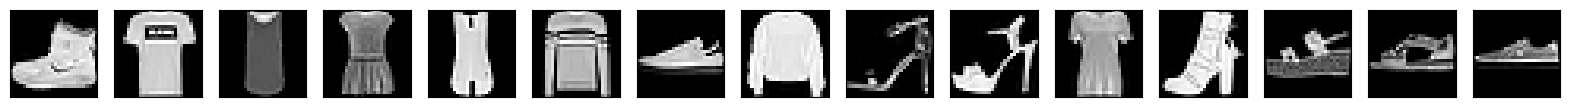

In [5]:
import matplotlib.pyplot as plt
n=15
plt.figure(figsize=(20, 4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

# **b. Display the shape of x_train and y_train**

In [6]:
print("Shape of x_train:  ",x_train.shape)
print("Shape of y_train:  ",y_train.shape)

Shape of x_train:   (60000, 28, 28)
Shape of y_train:   (60000,)


In [7]:
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


# **3. Flatten the images**

# **a. Reshape the images from 28x28 to 28x28x1.**

In [8]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

# **4. Scale the data**

# **a. Convert the data into float 32 type**

In [9]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

# **b. Scale the data by dividing x_train and y_train by 255**

In [10]:
x_train/=255
x_test/=255

# **c. Display the shape of x_train and y_train after scaling.**

In [11]:
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Seeing updated Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)
x_test Shape : (10000, 28, 28, 1)
y_test Shape : (10000, 10)


# **5. Define the hyper parameters for the neural networks**

# a. No. of Epochs
# b. Batch size
# c. Input_size of image (Img_height, Img_width, No of channels)
# d. No of convolutional layers
# e. Output_size (output layers depending upon the number of classes)

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [14]:
img_rows, img_cols, channels= 28,28,1
#DEfine the no of filters for CNN
filters = [7,33,81,121]

#define the no of classes for classification
classes = 10

In [19]:
batch_size= 64
epochs= 15


In [16]:
#creating model
model = Sequential() #sequential is like a container that is use to add layers

model.add(Conv2D(filters[0],(3,3),padding='same',\
          activation = 'relu', input_shape=(img_rows, img_cols, channels)))

model.add(MaxPooling2D(pool_size=(2,2)))  #for reducing image size

model.add(Conv2D(filters[1],(2,2),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# **6. Define the structure of your neural network**

#a. No of Convolutional layers
#b. Activation function for each convolutional layer
#c. Flatten the 2D vectors into 1D vector for FCN
#d. Number of output layer neurons and activation function
#e. Compile the model and provide following arguments
#i. Loss function
#ii. Optimizer
#iii. Metric
# f. Display the summary of the model

In [17]:
#creating model
model = Sequential() #sequential is like a container that is use to add layers

model.add(Conv2D(filters[0],(3,3),padding='same',\
          activation = 'relu', input_shape=(img_rows, img_cols, channels)))

model.add(MaxPooling2D(pool_size=(2,2)))  #for reducing image size

model.add(Conv2D(filters[1],(2,2),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 7)         70        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 7)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 33)        957       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 33)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 81)          10773     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 81)        

# **7. Train the Neural Network**

# **a. Fit the Model**

In [20]:
model.fit(x_train, y_train, validation_split= 0.2, epochs=15, batch_size=64 ,verbose= 1)

Epoch 1/15
750/750 [==============================] - 14s 6ms/step - loss: 1.7931 - accuracy: 0.4272 - val_loss: 0.9302 - val_accuracy: 0.6601
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.8259 - accuracy: 0.6824 - val_loss: 0.7095 - val_accuracy: 0.7126
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.6678 - accuracy: 0.7446 - val_loss: 0.6610 - val_accuracy: 0.7388
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.5914 - accuracy: 0.7781 - val_loss: 0.5455 - val_accuracy: 0.8014
Epoch 5/15
750/750 [==============================] - 5s 6ms/step - loss: 0.5341 - accuracy: 0.8003 - val_loss: 0.5042 - val_accuracy: 0.8162
Epoch 6/15
750/750 [==============================] - 3s 5ms/step - loss: 0.4986 - accuracy: 0.8173 - val_loss: 0.5155 - val_accuracy: 0.8105
Epoch 7/15
750/750 [==============================] - 3s 5ms/step - loss: 0.4683 - accuracy: 0.8294 - val_loss: 0.4520 - val_accuracy: 0.8356
Epoch

# **b. Train the Model for 15 epochs and report the training accuracy.**

# **8. Test the model**

# **a. Find the testing accuracy of the model**

In [21]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#predict probabilities for the test set using trained model
y_pred_probs= model.predict(x_test, verbose=1)

y_pred= np.where(y_pred_probs>0.5,1,0)

test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


313/313 [==============================] - 1s 2ms/step

Test accuracy: 0.8363


# **b. Compare the training and testing accuracy and write you observation in the comments**


In [23]:
#training accuracy =  0.8701
#testing accuracy = 0.8363
#difference 0.8701-0.8363= 0.0338
#this is not as good as it should be but not much bad

# **c. Display the predicted labels along the input image.**

In [24]:
mask = range(20,60)

x_valid= x_test[30:60]
actual_labels= y_test[30:60]

y_pred_probs = model.predict(x_valid)
y_pred_valid= np.where(y_pred_probs > 0.5, 1, 0)

1/1 [==============================] - 0s 107ms/step


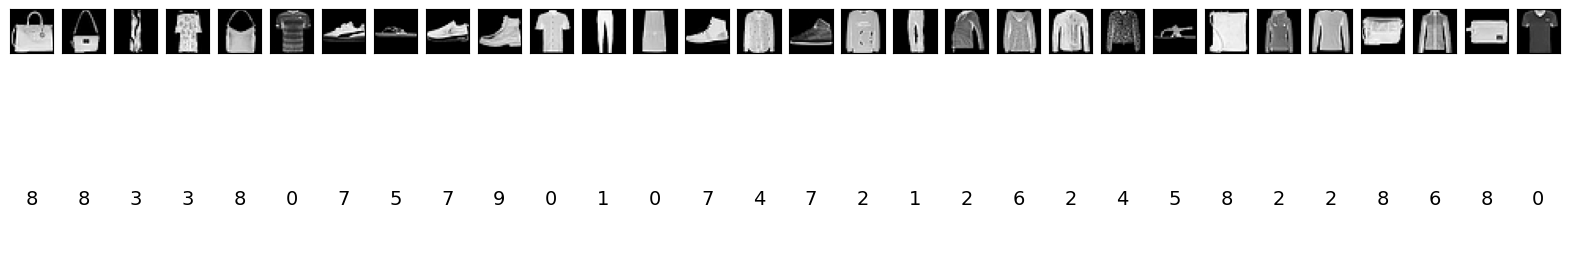

In [28]:
n=len(x_valid)
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  predicted_dress= np.argmax(y_pred_probs[i])
  ax= plt.subplot(2,n, i+1+n)
  plt.text(0.5, 0.5, str(predicted_dress), fontsize=14, ha='center', va='center')
  plt.axis('off')
plt.show()
plt.close()

